In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:

id1="1dtFSwTqsCQ3xZZUJgbG0nDbKGJqgHk5D"
downloaded = drive.CreateFile({'id':id1}) 
downloaded.GetContentFile('User.csv') 


In [ ]:
id= "10yx3JT71UB6aMC5FSbPX3u5wkZXsVUlR"


In [ ]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Posts.csv')  


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import math
import os
df1 = pd.read_csv('User.csv')
df1.head()

Name   Score  ...  Human Verified
0          Sarah Girl    1200  ...  False    False
1   Millstone-Diaries    3200  ...  False    False
2  Garrett Karls MAGA     325  ...   True    False
3          Proud Boys  544000  ...  False     True
4              Rudy G  490000  ...  False     True

[5 rows x 9 columns]

In [ ]:
df2 = pd.read_csv('Posts.csv')
df2.head()

Impressions  ...                           Creator
0        1200  ...  b12df9cacba44ff08837b823ba906f6b
1         585  ...  8290766df6a5425faa789461eb5051d0
2         575  ...  8290766df6a5425faa789461eb5051d0
3         573  ...  8290766df6a5425faa789461eb5051d0
4         783  ...  8290766df6a5425faa789461eb5051d0

[5 rows x 9 columns]

In [ ]:
df1p=df1
df2p=df2

In [ ]:
dk=(df2['Creator'].value_counts()/len(df2))*100
dk=dk[:10]
dk

8290766df6a5425faa789461eb5051d0    6.199421
1186902f79324fee8e08e5670026e67c    2.530776
4bdafdbc35f94816be2ee2647d684d74    1.379175
3cbff11cfb144f898949e94f260a21e5    1.083918
2bb8e3b7c8c446dd91c59274a619339b    0.975036
dd79944c7a9a4571b30f4433a879c391    0.947570
56105481a4f24e9ca8793ac1d097bb4d    0.904409
ffdf1fc30ac5416fa7cb2e6ad1d43291    0.899505
d6b275d38bc34e04ba4d147cc9cf8a6f    0.856344
d8351de608ea4442a8feeb58c4bd191a    0.829859
Name: Creator, dtype: float64

In [ ]:
uid = dk.index.tolist()
per = dk.tolist()
uid
per


[6.199421256559909,
 2.5307763990386976,
 1.3791750453676002,
 1.0839177988130855,
 0.9750355583893277,
 0.9475697680121634,
 0.9044092402766197,
 0.8995046348521262,
 0.8563441071165825,
 0.829859237824317]

In [ ]:
uname=[]
for j in range(len(uid)):
  for i in df1.index:
    if(df1["Id"][i]==uid[j]):

      uname.append(df1["Username"][i])
      
      
uname

['Patriots4US',
 'TheRealWakeUpMfers',
 'GameOver',
 'Billyboy428',
 'marylandcrabbing',
 '2ndPro1776',
 'LucidKeK',
 'UnravelTheWeb',
 'GrinPioneer',
 'Reeseysnotsorry']

Question 1 a) i)

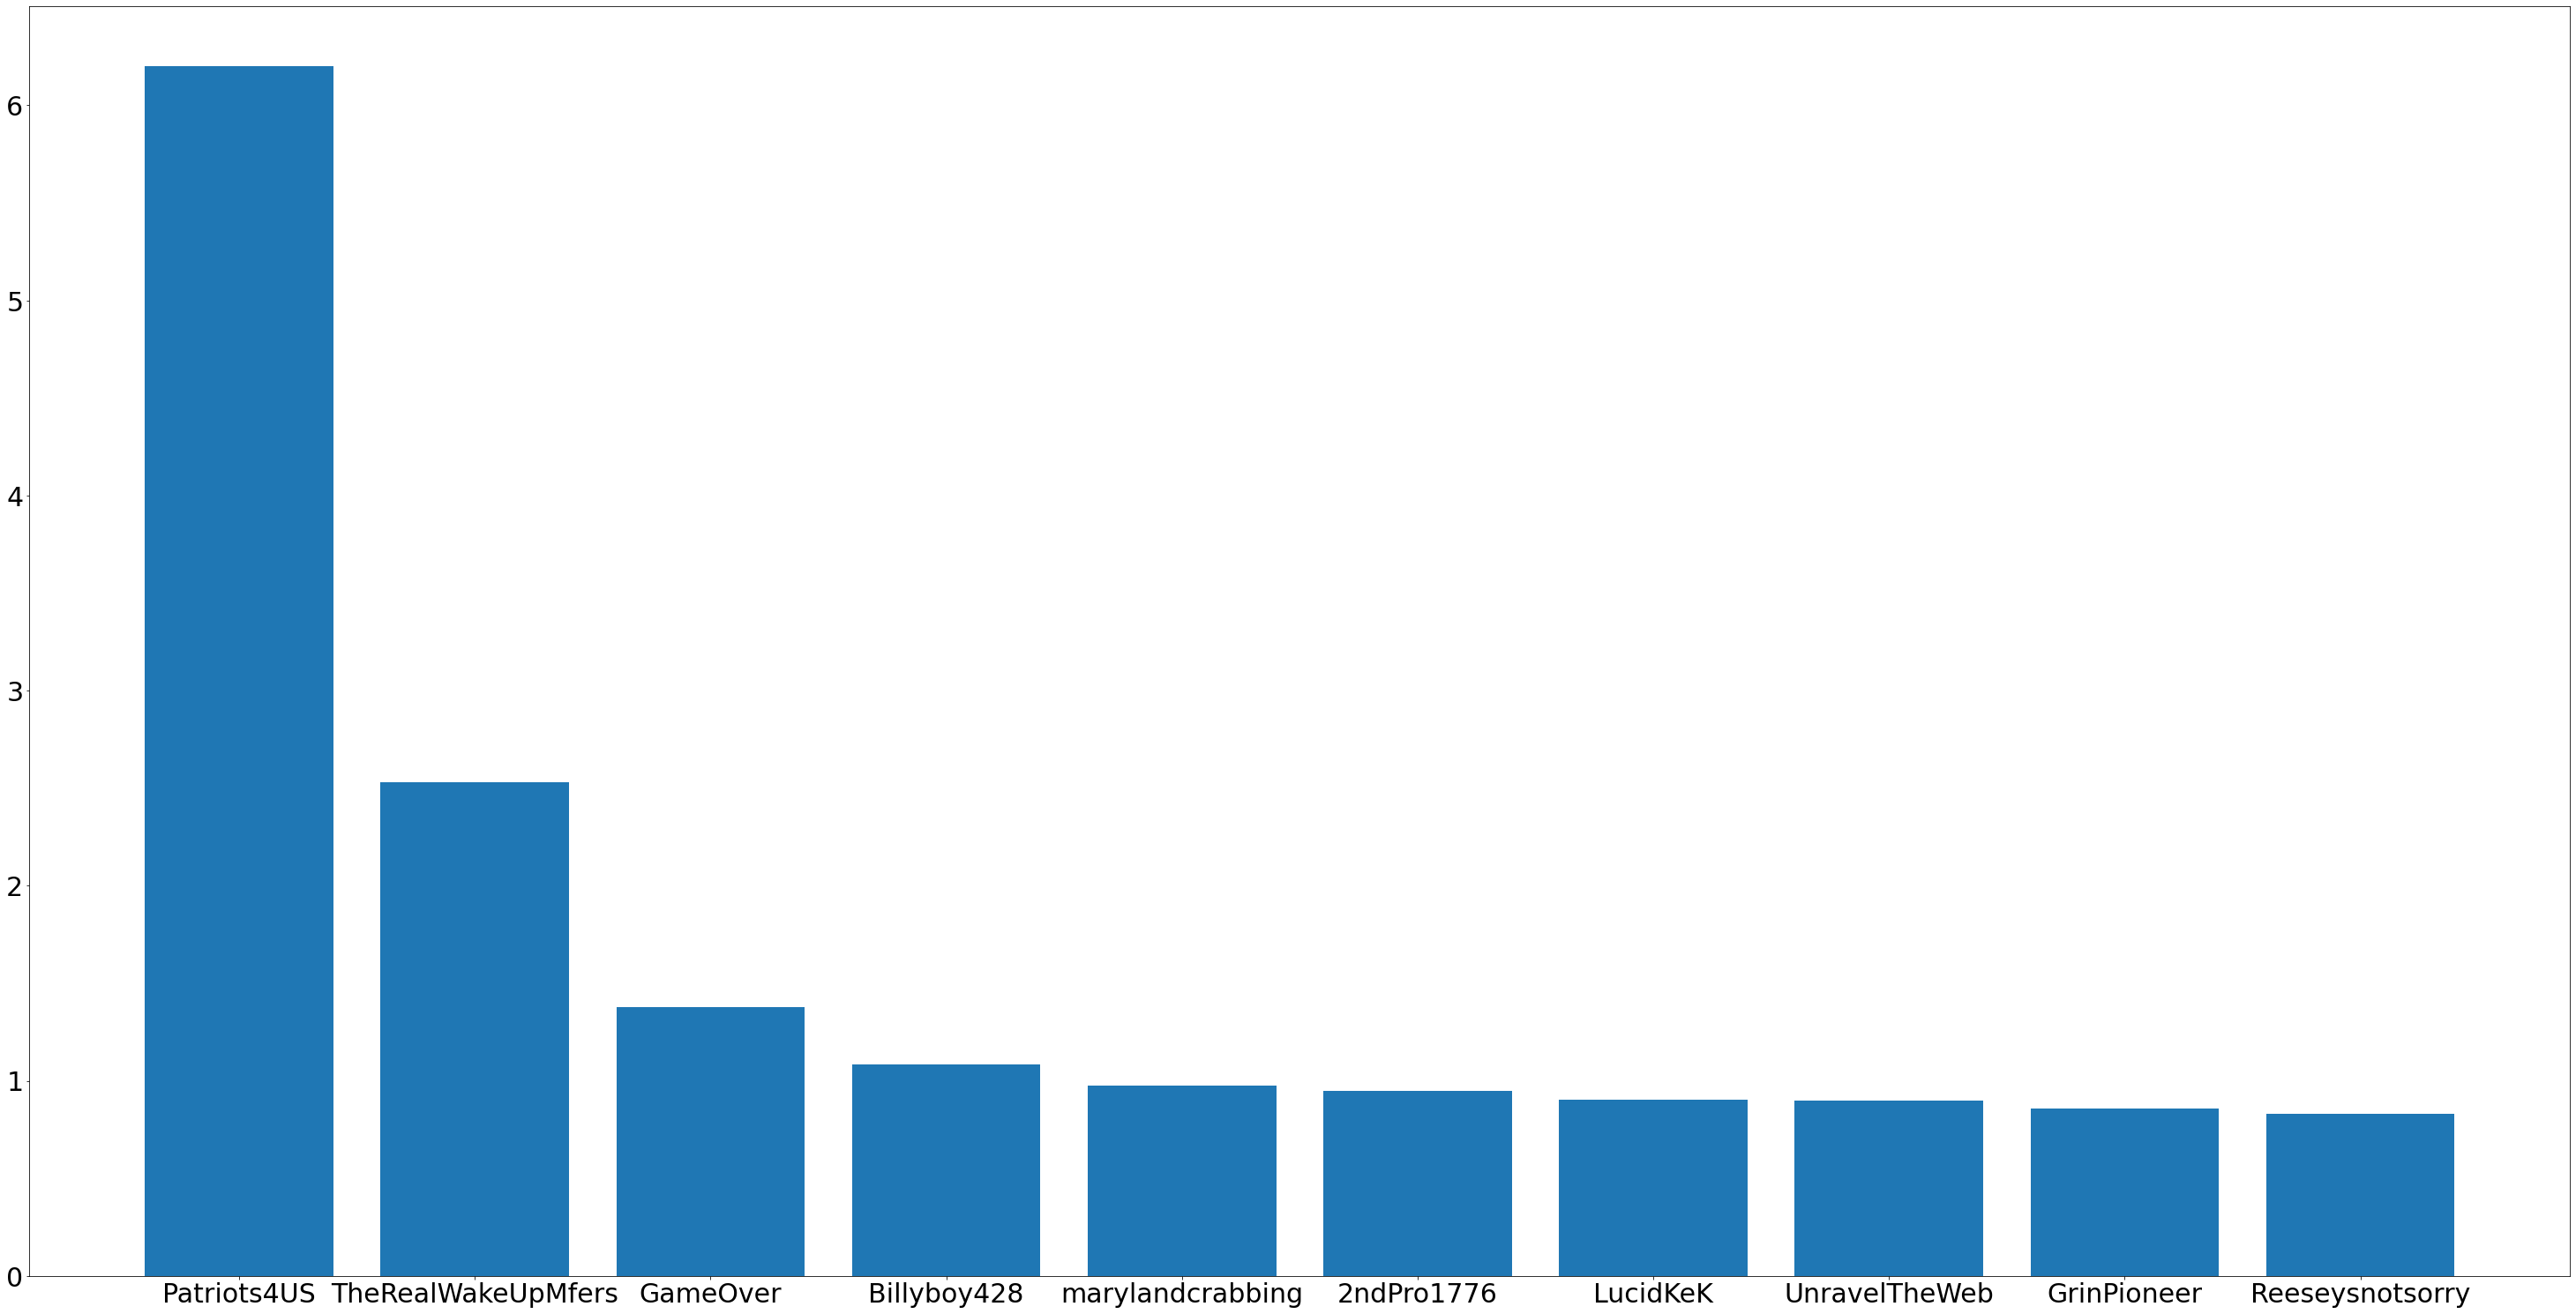

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(40, 20))
ax = fig.add_axes([0,0,1,1])
plt.rcParams['font.size'] = '40'

ax.bar(uname,per)
plt.show()

In [ ]:
sum(per)

16.60601304625043

In [ ]:
hv=0
hnv=0
nhv=0
nhnv=0
human=[]
verified=[]
for j in range(len(uid)):
  for i in df1.index:
    if(df1["Username"][i]==uname[j]):

      human.append(df1["Human"][i])
      verified.append(df1["Verified"][i])

human     
for i in range(len(uid)):
  if(human[i]==True and verified[i]==True ):
    hv=hv+1
  if(human[i]==True and verified[i]==False ):
    hnv=hnv+1
  if(human[i]==False and verified[i]==True ):
    nhv=nhv+1
  if(human[i]==False and verified[i]==False ):
    nhnv=nhnv+1
  
print(" Human and Verified")
print(hv)
  
print(" Human and Not Verified")
print(hnv)
  
print(" Not Human and Verified")
print(nhv)
  
print(" Not Human and Not Verified")
print(nhnv)

 Human and Verified
0
 Human and Not Verified
6
 Not Human and Verified
0
 Not Human and Not Verified
4


Text(0, 0.5, 'Percent')

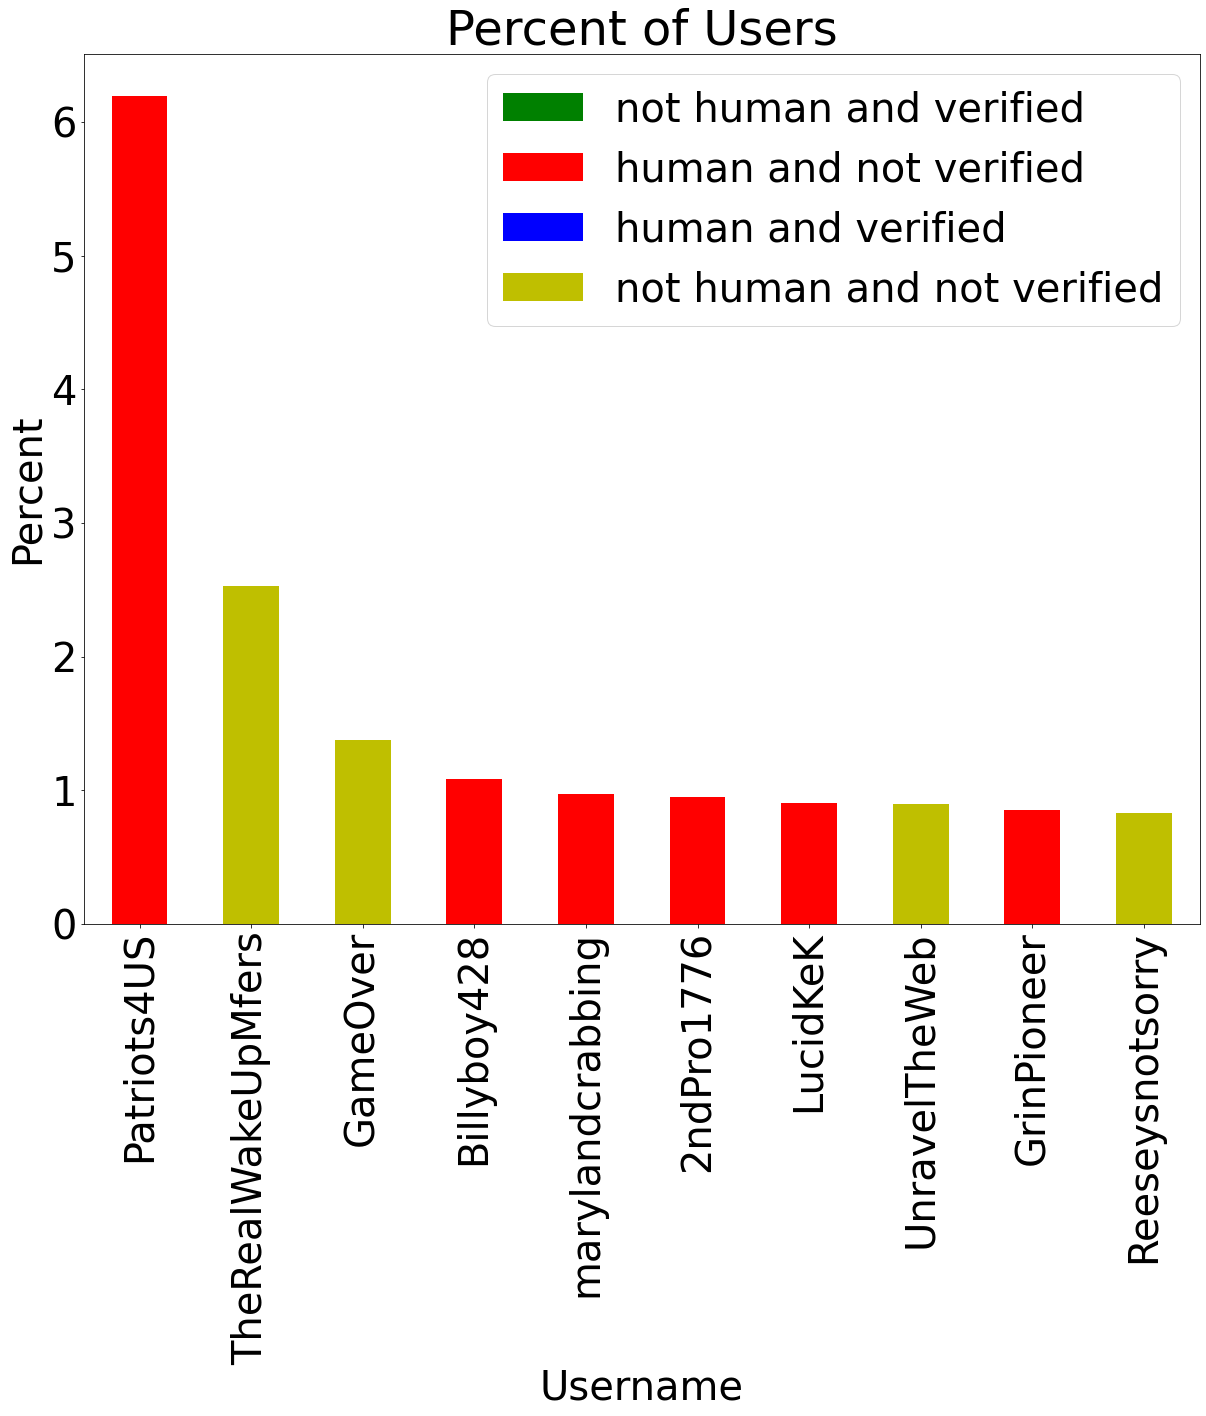

In [ ]:
human=[]
verified=[]
for j in range(len(uid)):
  for i in df1.index:
    if(df1["Username"][i]==uname[j]):

      human.append(df1["Human"][i])
      verified.append(df1["Verified"][i])

human
cate=[]     
for i in range(len(uid)):
  if(human[i]==True and verified[i]==True ):
    cate.append("human and verified")
  if(human[i]==True and verified[i]==False ):
    cate.append("human and not verified")
  if(human[i]==False and verified[i]==True ):
    cate.append("not human and verified")
  if(human[i]==False and verified[i]==False ):
    cate.append("not human and not verified")
cate
plt.rcParams["figure.figsize"] = [20, 16]  
plotdata = pd.DataFrame({
    "Percent": per, 
    "gender": cate
    }, 
    index=uname
)
plotdata
colours = {"not human and verified": "g", "human and not verified": "r","human and verified":"b","not human and not verified":"y"}
plotdata['Percent'].plot(
    kind="bar", 
    color=plotdata['gender'].replace(colours)
)
from matplotlib.patches import Patch

plotdata['Percent'].plot(
        kind="bar", color=plotdata['gender'].replace(colours)
).legend(
    [
        Patch(facecolor=colours['not human and verified']),
        Patch(facecolor=colours['human and not verified']),
        Patch(facecolor=colours['human and verified']),
        Patch(facecolor=colours['not human and not verified'])
    ], ["not human and verified", "human and not verified","human and verified","not human and not verified"]
)
plt.title("Percent of Users")
plt.xlabel("Username")
plt.ylabel("Percent")

In [ ]:
df1c=df1
upvotes=[]
dk2=df1c.sort_values('Score',ascending=False)
dk2=dk2[0:10]
dk2

Name    Score  ...  Human Verified
70                          Dan Bongino  6000000  ...  False     True
69                           Mark Levin  5800000  ...  False     True
135                        Sean Hannity  5700000  ...   True     True
43                             LLinWood  5200000  ...  False     True
53                       Dinesh D’Souza  4500000  ...  False     True
504                      Tommy Robinson  4000000  ...  False     True
739                     The Epoch Times  3500000  ...   True    False
146   We Love President Donald J. Trump  2000000  ...   True    False
7726                            private  2000000  ...   True    False
55                   The Gateway Pundit  2000000  ...  False     True

[10 rows x 9 columns]

In [ ]:
unamei=dk2['Username'].tolist()
upv=dk2['Score'].tolist()
unamei

['Dbongino',
 'Marklevinshow',
 'SeanHannity',
 'linwood',
 'DineshDSouza',
 'TommyRobinson',
 'epochtimes',
 'WeLoveTrump',
 'Redcode71',
 'GatewayPundit']

In [ ]:
human=[]
verified=[]
for j in range(len(uid)):
  for i in df1.index:
    if(df1["Username"][i]==unamei[j]):

      human.append(df1["Human"][i])
      verified.append(df1["Verified"][i])

human
verified

[True, True, True, True, True, True, False, False, False, True]

In [ ]:

cate=[]     
for i in range(len(uid)):
  if(human[i]==True and verified[i]==True ):
    cate.append("human and verified")
  if(human[i]==True and verified[i]==False ):
    cate.append("human and not verified")
  if(human[i]==False and verified[i]==True ):
    cate.append("not human and verified")
  if(human[i]==False and verified[i]==False ):
    cate.append("not human and not verified")
cate

['not human and verified',
 'not human and verified',
 'human and verified',
 'not human and verified',
 'not human and verified',
 'not human and verified',
 'human and not verified',
 'human and not verified',
 'human and not verified',
 'not human and verified']

Question 2 a) i)

Text(0, 0.5, 'Upvotes')

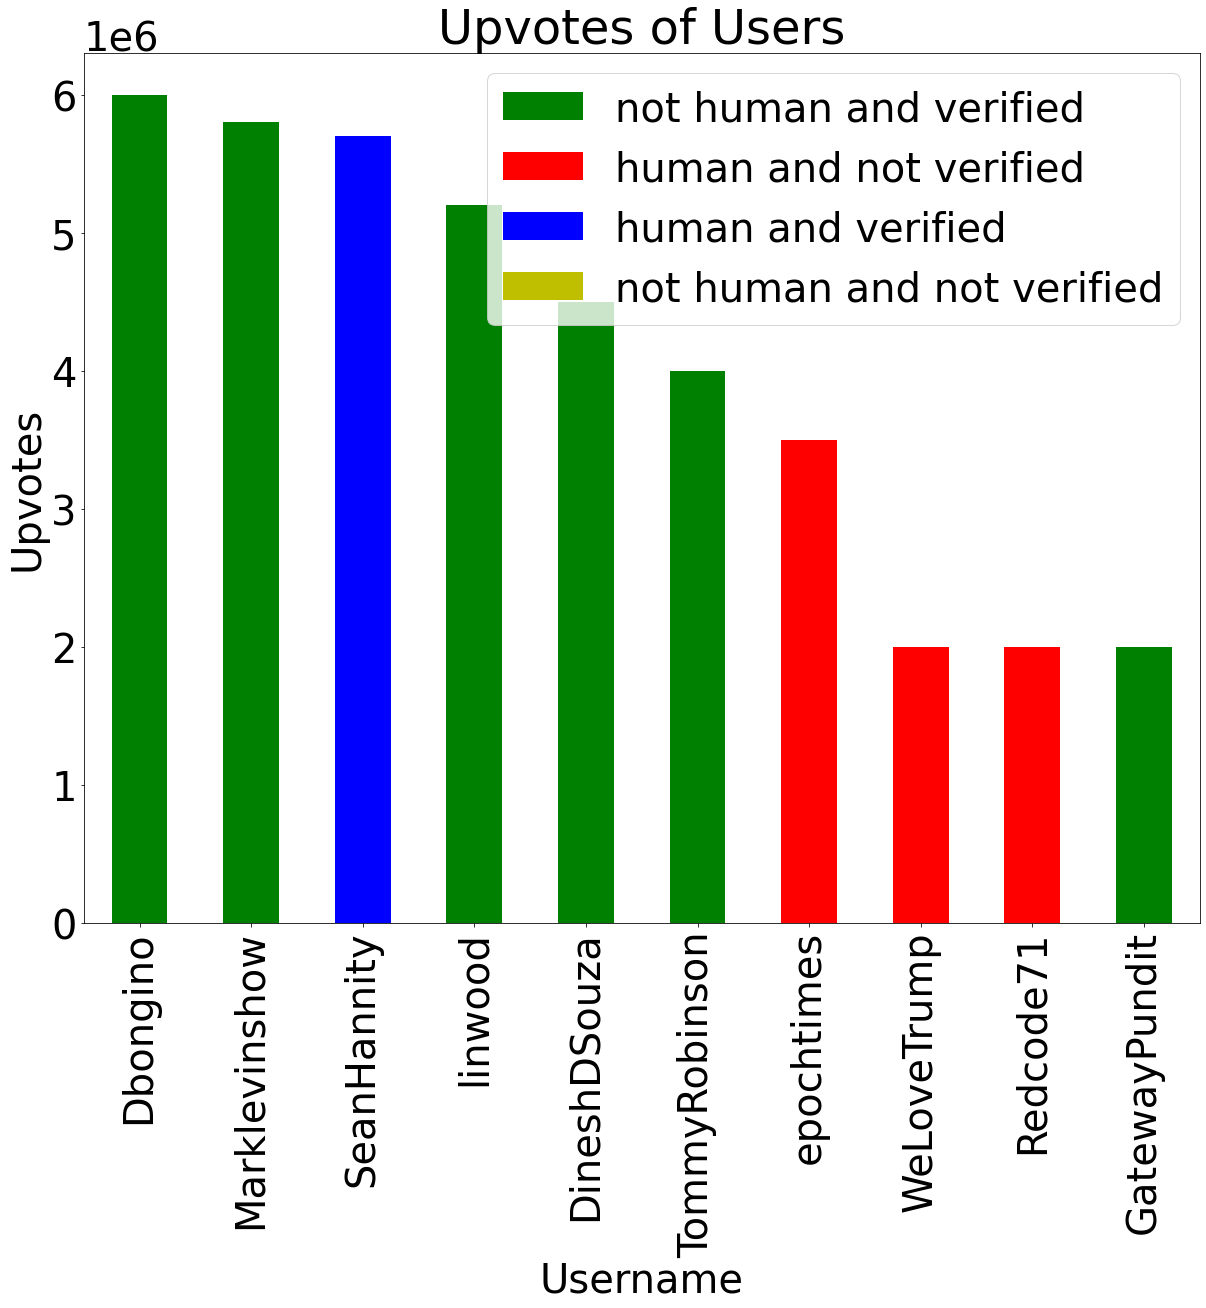

In [ ]:
plt.rcParams["figure.figsize"] = [20, 16]  
plotdata = pd.DataFrame({
    "Upvotes": upv, 
    "gender": cate
    }, 
    index=unamei
)
plotdata
colours = {"not human and verified": "g", "human and not verified": "r","human and verified":"b","not human and not verified":"y"}
plotdata['Upvotes'].plot(
    kind="bar", 
    color=plotdata['gender'].replace(colours)
)
from matplotlib.patches import Patch

plotdata['Upvotes'].plot(
        kind="bar", color=plotdata['gender'].replace(colours)
).legend(
    [
        Patch(facecolor=colours['not human and verified']),
        Patch(facecolor=colours['human and not verified']),
        Patch(facecolor=colours['human and verified']),
        Patch(facecolor=colours['not human and not verified'])
    ], ["not human and verified", "human and not verified","human and verified","not human and not verified"]
)
plt.title("Upvotes of Users")
plt.xlabel("Username")
plt.ylabel("Upvotes")

In [ ]:
df12=df1
df12.head()

Name   Score  ...  Human Verified
0          Sarah Girl    1200  ...  False    False
1   Millstone-Diaries    3200  ...  False    False
2  Garrett Karls MAGA     325  ...   True    False
3          Proud Boys  544000  ...  False     True
4              Rudy G  490000  ...  False     True

[5 rows x 9 columns]

In [ ]:
dk21=df12.sort_values('Interactions',ascending=False)
dk21=dk21[0:10]
dk21

Name    Score  ...  Human Verified
69                   Mark Levin  5800000  ...  False     True
9882                Amy Peikoff    30000  ...   True    False
183                      Parler    24000  ...  False     True
342    Parler Dev Announcements     1400  ...  False     True
21580                oathk33per      536  ...   True    False
16619                     Jared       52  ...  False     True
9394               USMC Patriot     1500  ...   True    False
7476             Jeffreywernick    21000  ...   True    False
104               John Matze 🇺🇸   257000  ...   True     True
18235                  木兰传奇（文奇）      312  ...  False    False

[10 rows x 9 columns]

In [ ]:
unamei1=dk21['Username'].tolist()
interactions=dk21['Interactions'].tolist()
unamei1

['Marklevinshow',
 'AmyPeikoff',
 'parler',
 'parlerdev',
 'oathkeep3r',
 'Jared',
 'OmegaGeek',
 'Jeffreywernick',
 'John',
 'Mulan2020']

In [ ]:
human=[]
verified=[]
for j in range(len(unamei1)):
  for i in df1.index:
    if(df1["Username"][i]==unamei1[j]):

      human.append(df1["Human"][i])
      verified.append(df1["Verified"][i])

human


[False, True, False, False, True, False, True, True, True, False]

In [ ]:
verified

[True, False, True, True, False, True, False, False, True, False]

In [ ]:
cate=[]     
for i in range(len(uid)):
  if(human[i]==True and verified[i]==True ):
    cate.append("human and verified")
  if(human[i]==True and verified[i]==False ):
    cate.append("human and not verified")
  if(human[i]==False and verified[i]==True ):
    cate.append("not human and verified")
  if(human[i]==False and verified[i]==False ):
    cate.append("not human and not verified")
cate

['not human and verified',
 'human and not verified',
 'not human and verified',
 'not human and verified',
 'human and not verified',
 'not human and verified',
 'human and not verified',
 'human and not verified',
 'human and verified',
 'not human and not verified']

Text(0, 0.5, 'Interactions')

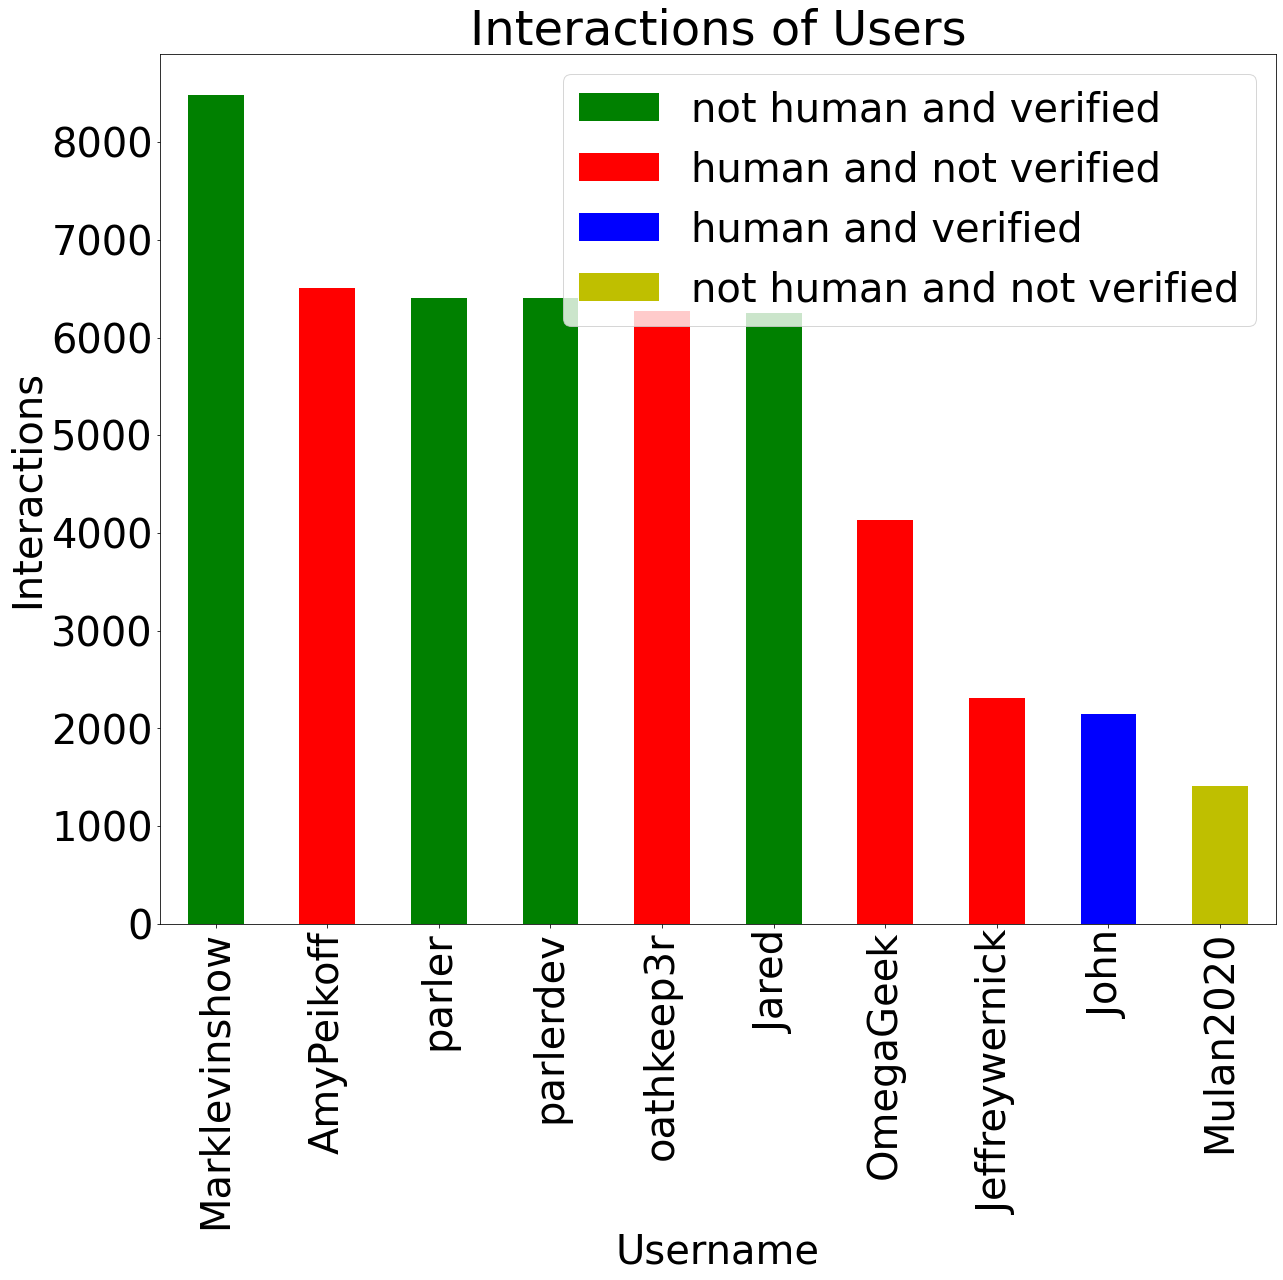

In [ ]:
plt.rcParams["figure.figsize"] = [20, 16]  
plotdata = pd.DataFrame({
    "Interactions": interactions, 
    "gender": cate
    }, 
    index=unamei1
)
plotdata
colours = {"not human and verified": "g", "human and not verified": "r","human and verified":"b","not human and not verified":"y"}
plotdata['Interactions'].plot(
    kind="bar", 
    color=plotdata['gender'].replace(colours)
)
from matplotlib.patches import Patch

plotdata['Interactions'].plot(
        kind="bar", color=plotdata['gender'].replace(colours)
).legend(
    [
        Patch(facecolor=colours['not human and verified']),
        Patch(facecolor=colours['human and not verified']),
        Patch(facecolor=colours['human and verified']),
        Patch(facecolor=colours['not human and not verified'])
    ], ["not human and verified", "human and not verified","human and verified","not human and not verified"]
)
plt.title("Interactions of Users")
plt.xlabel("Username")
plt.ylabel("Interactions")

In [ ]:
import ast
ts=df2["At"][89]
print(ts)
res = ast.literal_eval(ts) 
res

{'republicanparty': '310f7705eb27b5f33faeff3c14ac88da', 'democraticparty': '220a66391cf34890b14efcf73771516d', 'blocked': '167df95946cb42bfa06afe136cb8eb28', 'scotus': '8ca4e06199b8475ea18cc15a4fbef2ae'}


{'blocked': '167df95946cb42bfa06afe136cb8eb28',
 'democraticparty': '220a66391cf34890b14efcf73771516d',
 'republicanparty': '310f7705eb27b5f33faeff3c14ac88da',
 'scotus': '8ca4e06199b8475ea18cc15a4fbef2ae'}

In [ ]:
import collections
mentions=[]
import ast
for l in df2.index:
  
  tdic=ast.literal_eval(df2["At"][l])
  ke=tdic.values()
  for k in ke:
    mentions.append(k)

mentions
mentioncou=collections.Counter(mentions)
mentioncou=mentioncou.most_common(10)
mentioncou=dict(mentioncou)
menti=list(mentioncou.keys())
mcount=list(mentioncou.values())
menti

['64ebc91ab5df4b768c37c21cc8a9e639',
 '2ea66900ed69a5005fe51fc8b07a1711',
 '4b8638eca2db4b17b3a7203e40ac8ce7',
 '34968cde93e74071990f927980baa2d9',
 '89e43877e52645a1bf8239d8a4fa2ac2',
 'e8aa2091a216a7c5427090fc73f7a9ed',
 'ac3d687553924ca48daf698cefb7a73d',
 '167df95946cb42bfa06afe136cb8eb28',
 '639ab548c6c24b5c9aa135bb94811258',
 'fd4eaf2436164605b291ba98e7061d7b']

In [ ]:
human=[]
verified=[]
mentu=[]
for j in range(len(menti)):
  for i in df1.index:
    if(df1["Id"][i]==menti[j]):

      human.append(df1["Human"][i])
      verified.append(df1["Verified"][i])
      mentu.append(df1["Username"][i])

human

[False, False, True, False, False, False, False, False, False, False]

In [ ]:
verified

[True, True, True, True, True, True, True, False, True, True]

In [ ]:
cate=[]     
for i in range(len(uid)):
  if(human[i]==True and verified[i]==True ):
    cate.append("human and verified")
  if(human[i]==True and verified[i]==False ):
    cate.append("human and not verified")
  if(human[i]==False and verified[i]==True ):
    cate.append("not human and verified")
  if(human[i]==False and verified[i]==False ):
    cate.append("not human and not verified")
cate

['not human and verified',
 'not human and verified',
 'human and verified',
 'not human and verified',
 'not human and verified',
 'not human and verified',
 'not human and verified',
 'not human and not verified',
 'not human and verified',
 'not human and verified']

Question 2) a) iii)

Text(0, 0.5, 'Mentions')

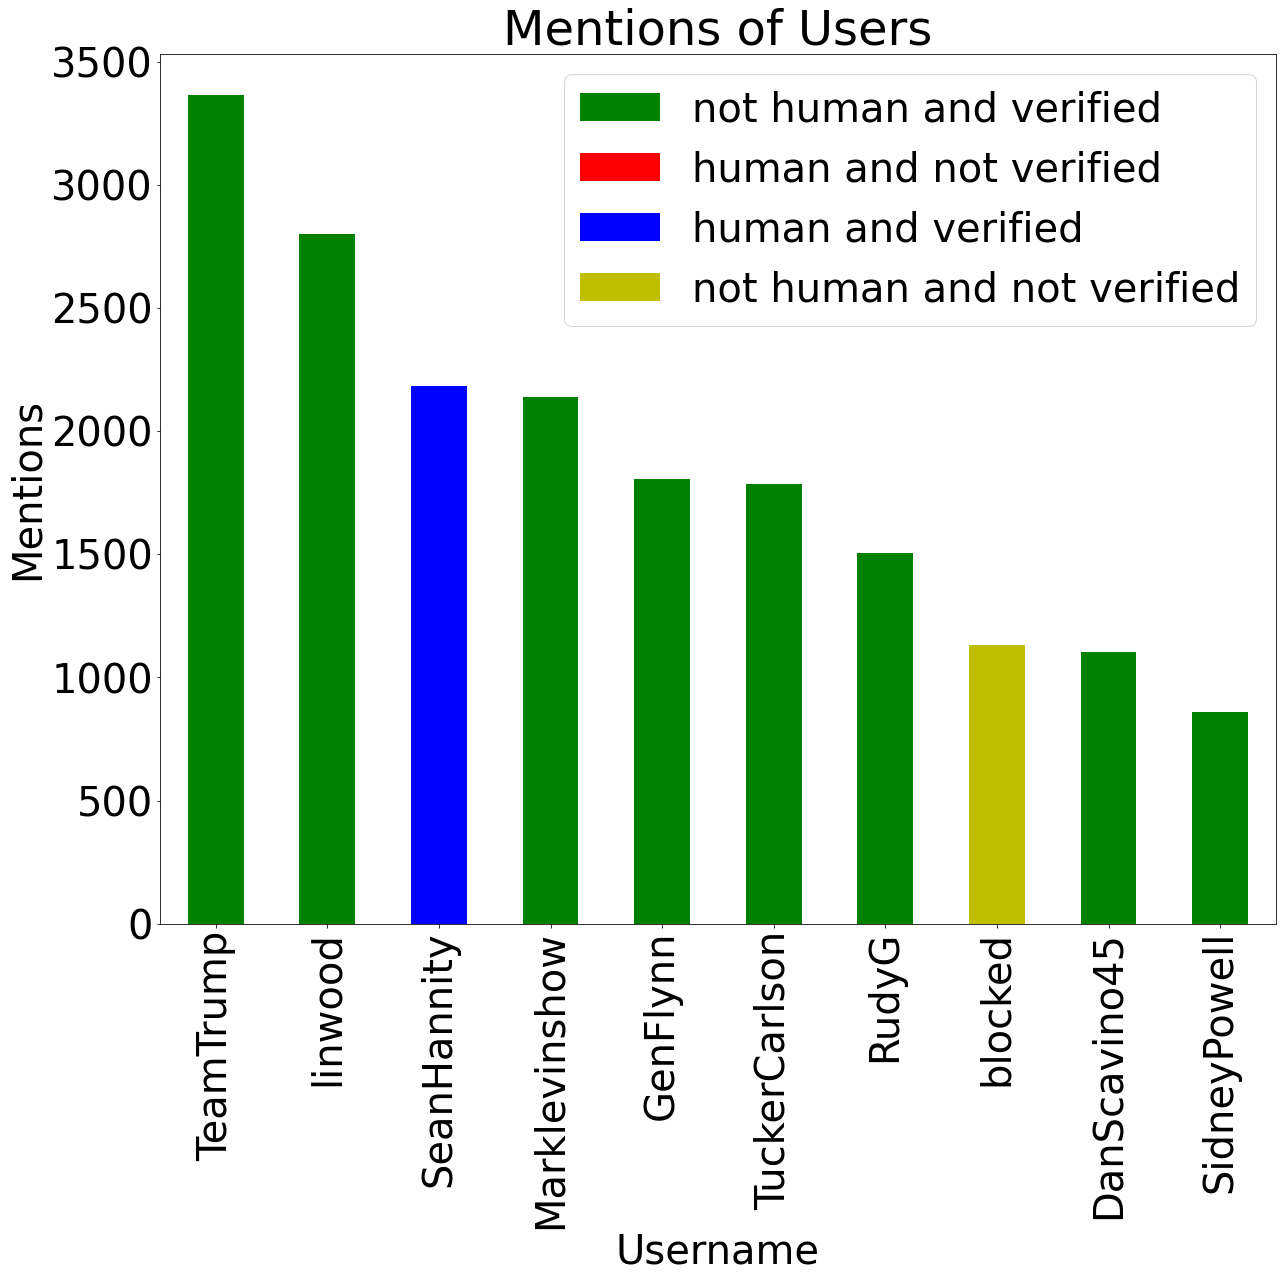

In [ ]:
plt.rcParams["figure.figsize"] = [20, 16]  
plotdata = pd.DataFrame({
    "Mentions": mcount, 
    "gender": cate
    }, 
    index=mentu
)
plotdata
colours = {"not human and verified": "g", "human and not verified": "r","human and verified":"b","not human and not verified":"y"}
plotdata['Mentions'].plot(
    kind="bar", 
    color=plotdata['gender'].replace(colours)
)
from matplotlib.patches import Patch

plotdata['Mentions'].plot(
        kind="bar", color=plotdata['gender'].replace(colours)
).legend(
    [
        Patch(facecolor=colours['not human and verified']),
        Patch(facecolor=colours['human and not verified']),
        Patch(facecolor=colours['human and verified']),
        Patch(facecolor=colours['not human and not verified'])
    ], ["not human and verified", "human and not verified","human and verified","not human and not verified"]
)
plt.title("Mentions of Users")
plt.xlabel("Username")
plt.ylabel("Mentions")

In [ ]:
from wordcloud import WordCloud, STOPWORDS
dk21
bio=dk21["Bio"].tolist()
bio

['THIS IS THE OFFICIAL MARK LEVIN SHOW PARLER PAGE. DOWNLOAD MY PODCAST FOR FREE: https://www.marklevinshow.com/audio-rewind/',
 '@Parler Policy | \\n\\nOfficial Parler statements come from @Parler |\\n\\n#photography #flowers #carnivorish #dontletitgo #legalizeprivacy\\ndontletitgo.com | legalizeprivacy.org| Pronoun: tough cookie',
 'Parler is committed to non-partisan free speech. You determine social discussion/direction, not us.',
 'Official announcements from the Parler Development team. Bugs can be reported at Support@Parler.com',
 'I work QA for Parler - let’s get this 🍞. Also, ask me questions. \\n\\n#lgbtq #gym #blm #latinx',
 'Founder and Lead Engineer at Parler\\n\\nSamurai | Keyboard Cowboy\\nHack The Planet',
 '#usmcveteran #dontcaliforniamytexas \\n#trump2020 \\n\\nOnly time I didn’t vote red was in 92 when I voted for Perot. So yeah I’ll take a bit of blame for Clinton’s win. 😂 🤦\u200d♂️',
 'Early bitcoin adopter, advocate and acquirer. Seed investor. Angel investor. Fre

In [ ]:
ful=""
for ele in bio:
  k=str(ele)
  ful=ful+k


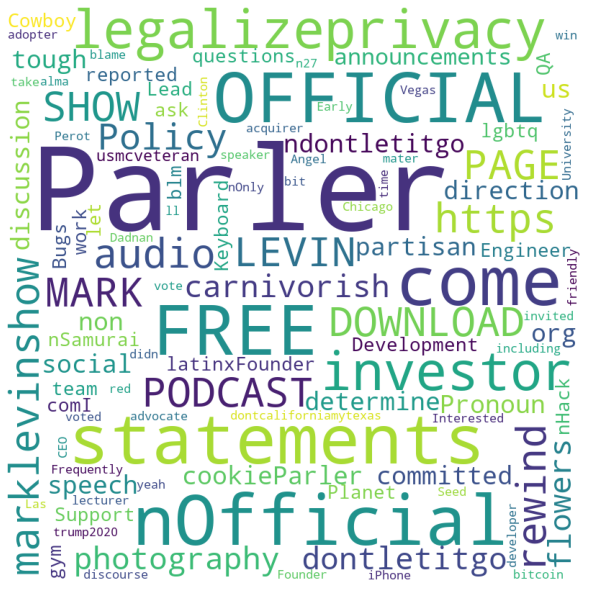

In [ ]:
stopwords = set(STOPWORDS)
stopwords



wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(ful) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
allpost=df2["Body"].tolist()
allpost
ful=""
for ele in allpost:
  k=str(ele)
  ful=ful+k
fulli=ful.split()


In [ ]:
ful1=[]
hash=[]
for ele in fulli:
  k=str(ele)
  if(k[0]!='#'):
    
    ful1.append(k)
  else:
    hash.append(k)

ful1
ful=""
ful2=[]
for ele in ful1:
  k=str(ele)
  k=k+" "
  ful2.append(k)
for ele in ful2:
  k=str(ele)

  ful=ful+k



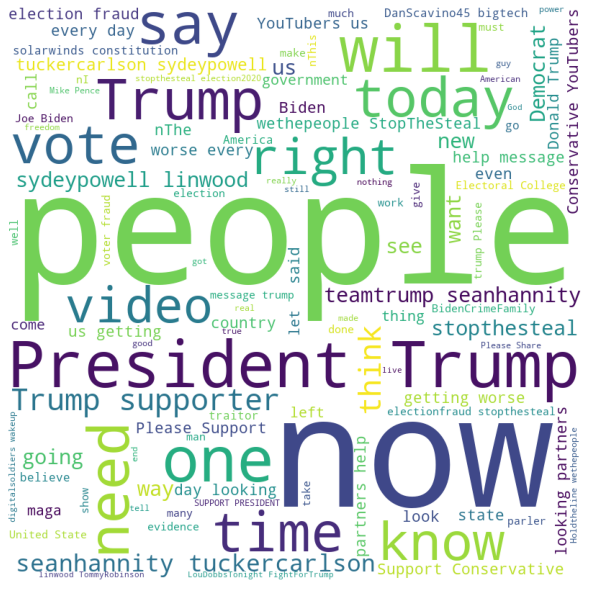

In [ ]:
stopwords = set(STOPWORDS) 

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(ful) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
ful1
import collections
filter=[]
from string import punctuation
special=set(punctuation)
special
for wor in ful1:
  if wor.lower() not in stopwords and wor not in special:
    filter.append(wor.lower())
filter
couwor = collections.Counter(filter)
type(couwor)
couwor=couwor.most_common(10)
couwor
cd=dict(couwor)
word=list(cd.keys())
count=list(cd.values())

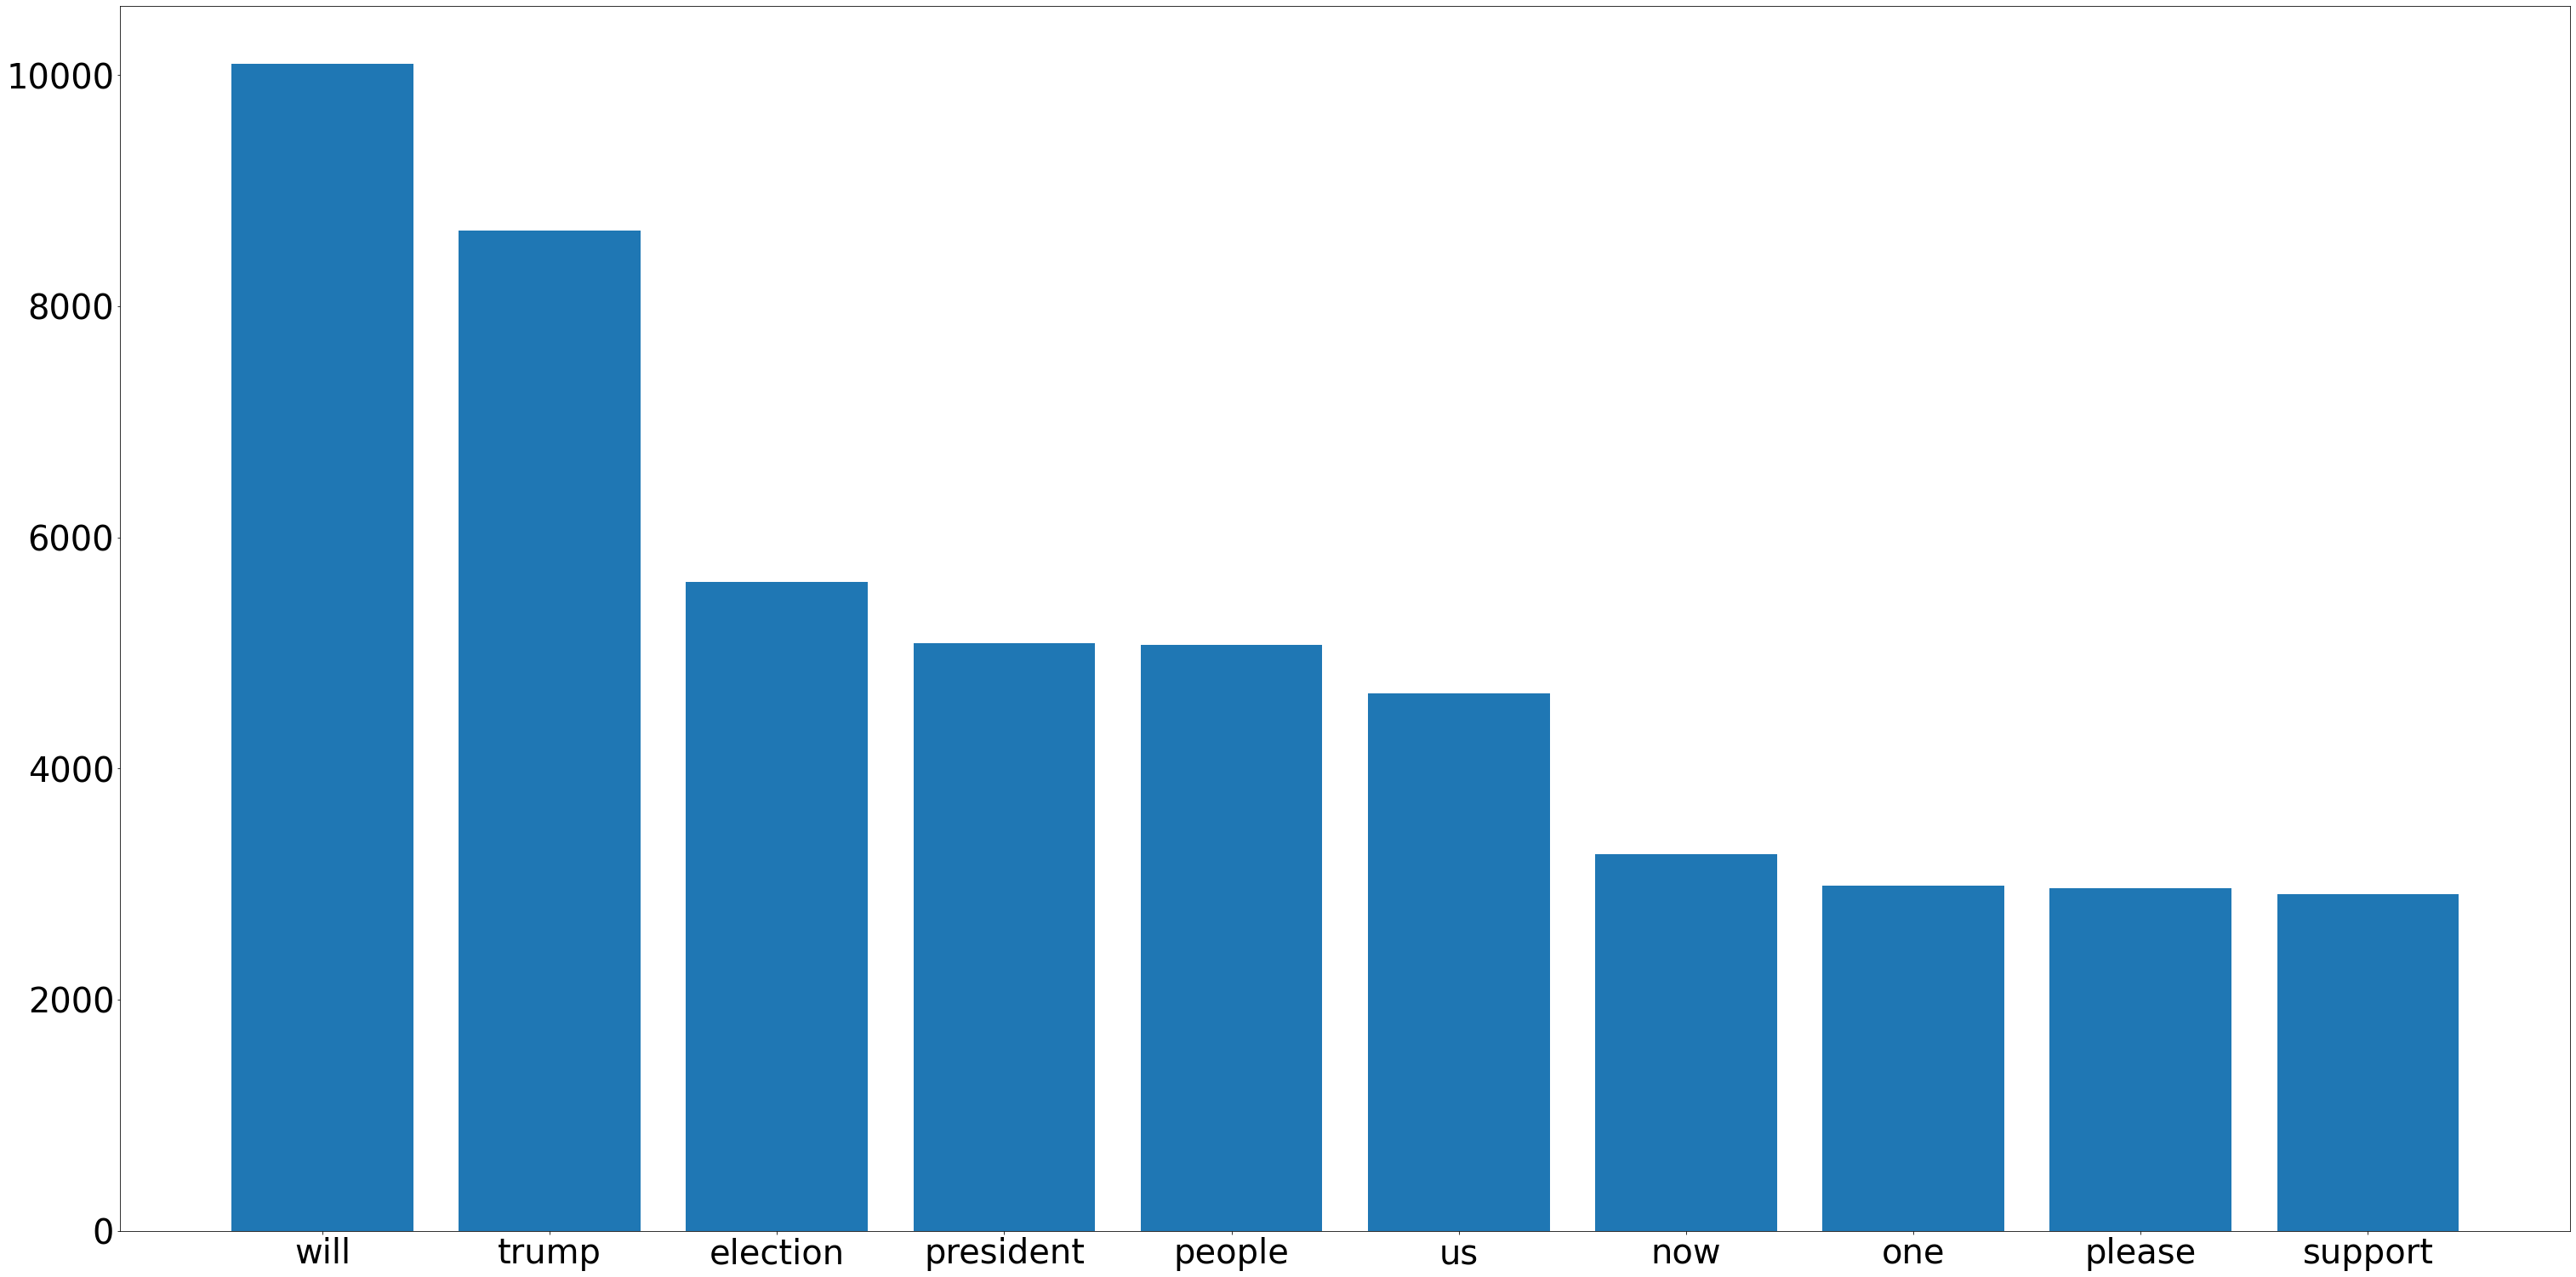

In [ ]:



import matplotlib.pyplot as plt
fig = plt.figure(figsize=(40, 20))
ax = fig.add_axes([0,0,1,1])
plt.rcParams['font.size'] = '30'

ax.bar(word,count)
plt.show()

In [ ]:
for i in range(0,len(hash)):
  hash[i]=hash[i].lower()
hashcou=collections.Counter(hash)
type(hashcou)

hashcou=hashcou.most_common(10)


Question 3 b) i)

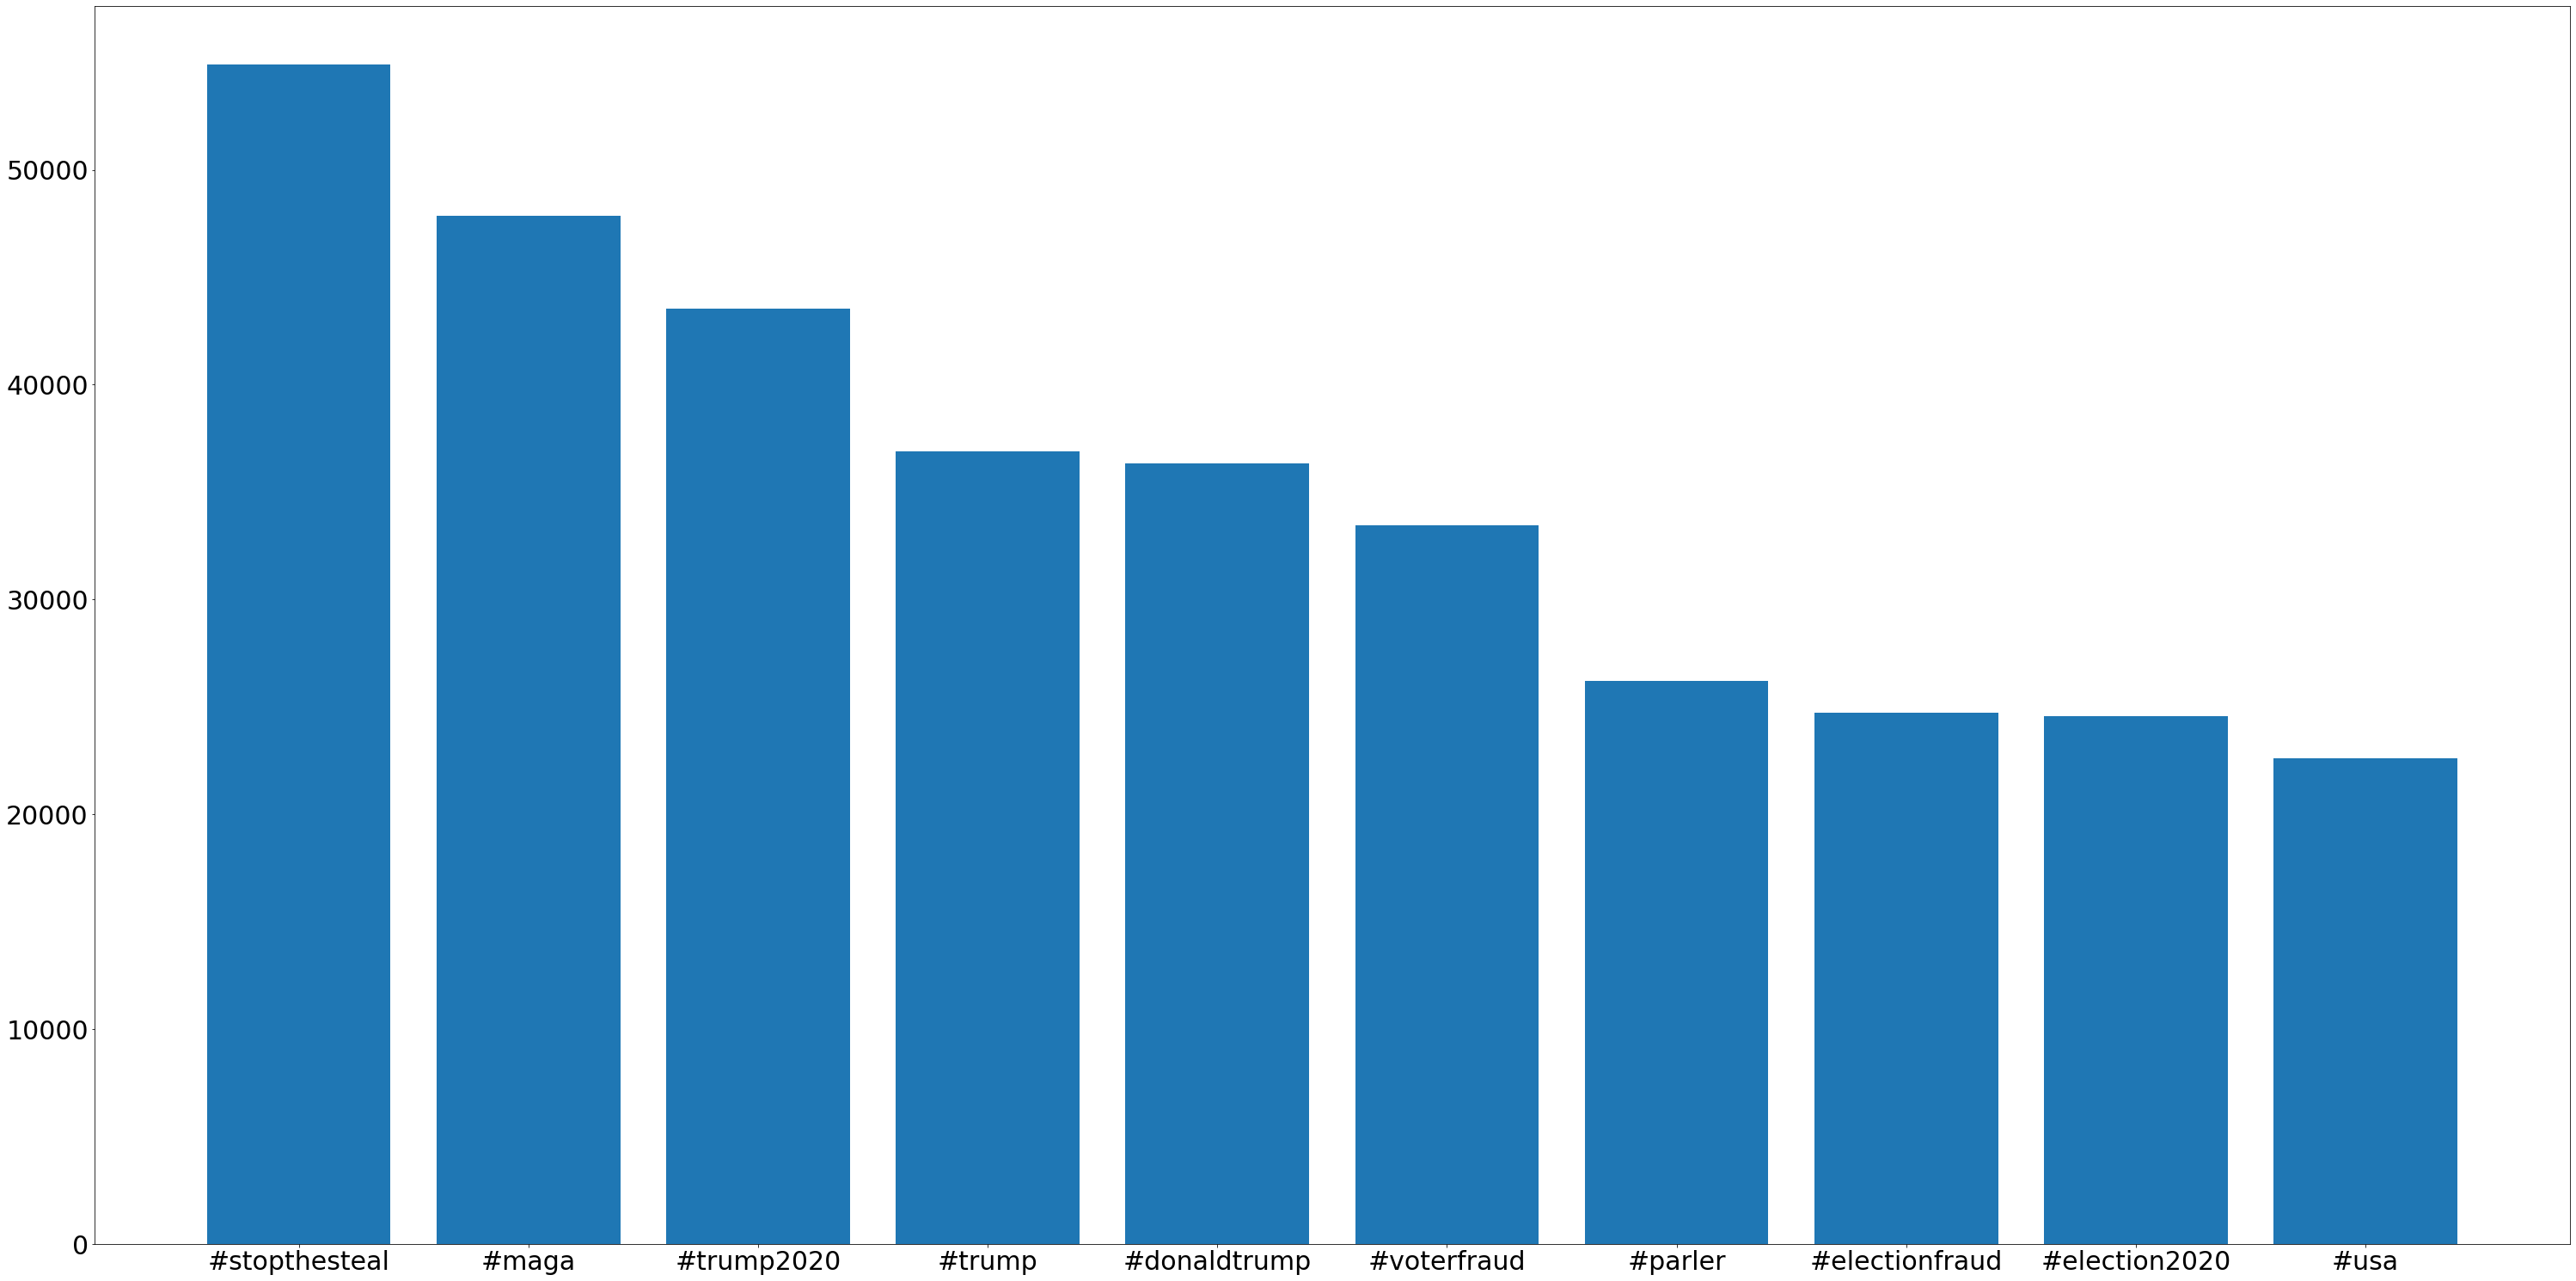

In [ ]:
cd=dict(hashcou)
word=list(cd.keys())
count=list(cd.values())
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(40, 20))
ax = fig.add_axes([0,0,1,1])
plt.rcParams['font.size'] = '30'

ax.bar(word,count)
plt.show()

In [ ]:
hash=list(set(hash))
len(hash)
type(df2["Body"][5])

str

In [ ]:
test=[]
hdic1={}
hdic2={}
for i in df2.index:
    bodte=str(df2["Body"][i])
    bodlis=bodte.split()
    for hs in bodlis:
      if(hs[0]=='#'):
        kr=0
        for jj in bodlis:
          if(jj[0]!='#' and jj!=hs):
            kr=kr+1
        if hs in hdic1:
          hdic1[hs]=hdic1[hs]+kr
        else:
          hdic1[hs]=kr
        if hs in hdic2:
          hdic2[hs]=hdic2[hs]+1
        else:
          hdic2[hs]=1


          
hdic3={}
for hi in hdic1:
  hdic3[hi]=hdic1[hi]/hdic2[hi]
hdic3
hval=hdic3.values()
hval=list(hval)
hval
hkey=hdic3.keys()
hkey=list(hkey)
hkey
hdf = pd.DataFrame(list(zip(hkey, hval)), 
               columns =['Hashtag', 'Count']) 
hdf          
hdf=hdf.sort_values('Count',ascending=False)
hdf=hdf[0:10]


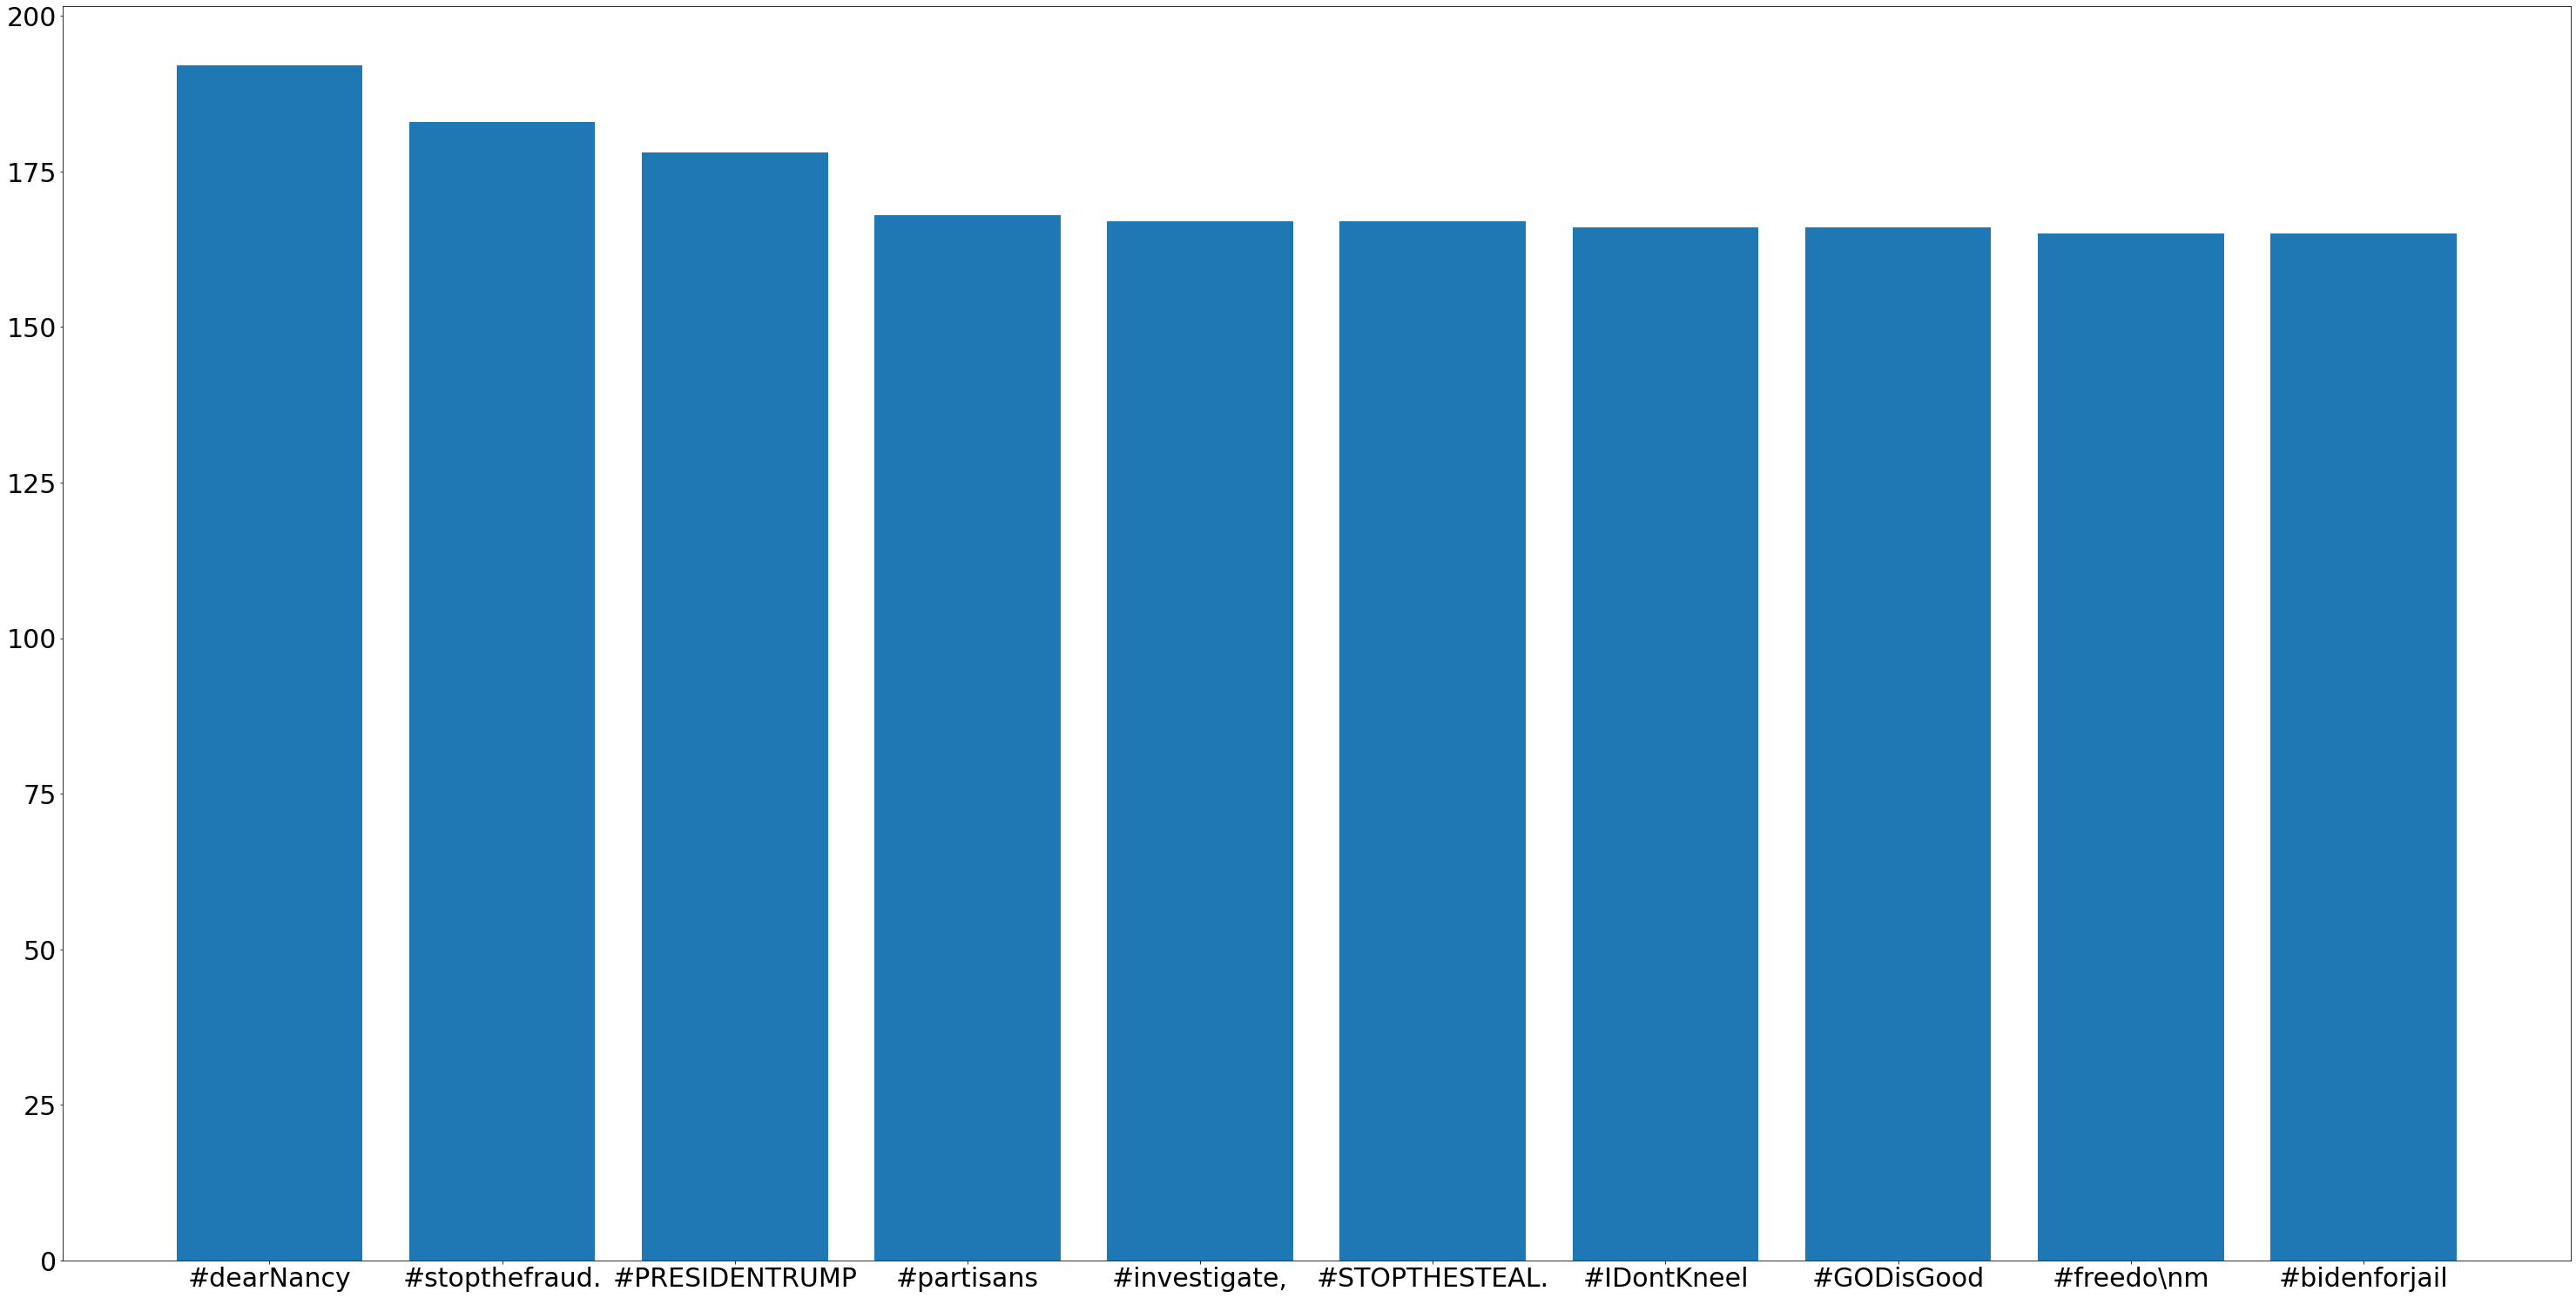

In [ ]:
hashx=hdf["Hashtag"].tolist()
hashcount=hdf["Count"].tolist()
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(40, 20))
ax = fig.add_axes([0,0,1,1])
plt.rcParams['font.size'] = '30'

ax.bar(hashx,hashcount)
plt.show()

In [ ]:
dt=df2["CreatedAt"].tolist()




In [ ]:
import datetime 

len(dt)

dtf=[]
for i in range(len(dt)):
  k=str(dt[i])
  dts=datetime.datetime.strptime(k,'%Y%m%d%H%M%S')
  dtf.append(dts)

dtf.sort()


In [ ]:
dtfcou=collections.Counter(dtf)


In [ ]:
dtfcoudic=dict(dtfcou)
datee=list(dtfcoudic.keys())
dcount=list(dtfcoudic.values())
dcount
import plotly.express as px
pdf = pd.DataFrame(list(zip(datee, dcount)), 
               columns =['Date', 'Count'])
fig = px.line(pdf, x='Date', y="Count")
fig.show()


In [ ]:
dt=df1["Joined"].tolist()
import datetime 

len(dt)

dtf=[]
for i in range(len(dt)):
  k=str(dt[i])
  dts=datetime.datetime.strptime(k,'%Y%m%d%H%M%S')
  dtf.append(dts)

dtf.sort()
dtf
dtfcou=collections.Counter(dtf)
len(dtfcou)
dtfcoudic=dict(dtfcou)
datee=list(dtfcoudic.keys())
dcount=list(dtfcoudic.values())
dcount

import plotly.express as px
pdf = pd.DataFrame(list(zip(datee, dcount)), 
               columns =['Date', 'Count'])
fig = px.line(pdf, x='Date', y="Count")
fig.show()